In [1]:
"""

https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras

from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
"""

"\n\nhttps://www.kaggle.com/amarjeet007/visualize-cnn-with-keras\n\nfrom keras.models import Model\nlayer_outputs = [layer.output for layer in model.layers]\nactivation_model = Model(inputs=model.input, outputs=layer_outputs)\nactivations = activation_model.predict(X_train[10].reshape(1,28,28,1))\n \ndef display_activation(activations, col_size, row_size, act_index): \n    activation = activations[act_index]\n    activation_index=0\n    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))\n    for row in range(0,row_size):\n        for col in range(0,col_size):\n            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')\n            activation_index += 1\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

#CNN Layers
from keras.layers import Conv2D,Activation,Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential

#Preprocessing
from keras.preprocessing.image import ImageDataGenerator

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Set Train and Test Path

In [3]:
train_path='C:\\Users\\PCPC\\Desktop\\Maturity\Train'
test_path='C:\\Users\\PCPC\\Desktop\\Maturity\\Test'

Set Train and Test Image Path

In [4]:
train_img_path=glob(train_path+'\\*\\*.jp*g')
test_img_path=glob(test_path+'\\*\\*.jp*g')

Set Folder Path for Class Name (using Train or Test)

In [5]:
folders=glob(train_path+'\\*')

Data Augmentation

In [13]:
gen=ImageDataGenerator(
    rotation_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #brightness_range=None,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
)

In [11]:
train_gen=gen.flow_from_directory(
    train_path,
    target_size=(1200,800),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=101,
    #save_to_dir='ripe',
    #save_prefix='aug',
    #save_format='jpeg',
)

Found 80 images belonging to 3 classes.


In [17]:
test_gen=gen.flow_from_directory(
    test_path,
    target_size=(1200,800),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    #seed=101,
)

Found 20 images belonging to 3 classes.


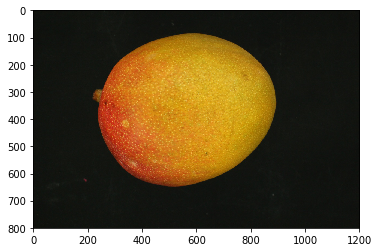

In [18]:
from keras.preprocessing import image
plt.imshow(image.load_img(np.random.choice(train_img_path)))

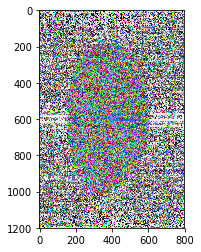

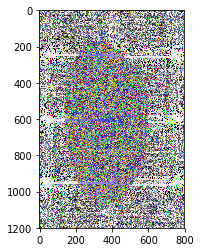

In [21]:
x_batch, y_batch = next(test_gen)
for i in range (0,2):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

Model Design

In [37]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(200,170,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),input_shape=(200,170,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),input_shape=(200,170,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),input_shape=(200,170,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),input_shape=(200,170,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



'''
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
'''

#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 198, 168, 32)      896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 198, 168, 32)      128       
_________________________________________________________________
activation_21 (Activation)   (None, 198, 168, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 84, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 99, 84, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 97, 82, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 97, 82, 64)        256       
__________

In [39]:
from keras import optimizers

In [40]:
model.compile(optimizer=optimizers.Adam(lr=0.001)
              ,loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
hist=model.fit_generator(
    generator=train_gen,
    steps_per_epoch=80//2,
    epochs=1,
    validation_data=test_gen,
    validation_steps=20//2,
)

Epoch 1/1
40/40 [==============================] - 29s 731ms/step - loss: 0.1964 - acc: 0.9203 - val_loss: 0.2468 - val_acc: 0.9000


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

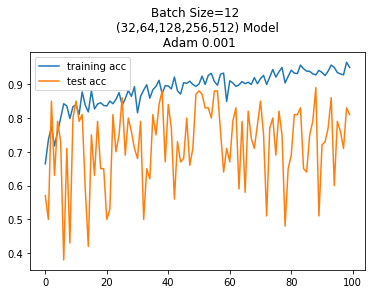

In [31]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

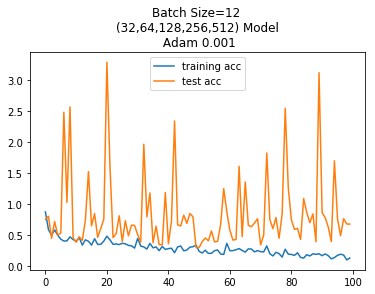

In [32]:
plt.plot(hist.history['loss'],label='training acc')
plt.plot(hist.history['val_loss'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

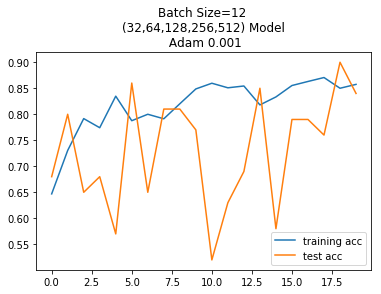

In [25]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam 0.001')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n SGD Optimizer')

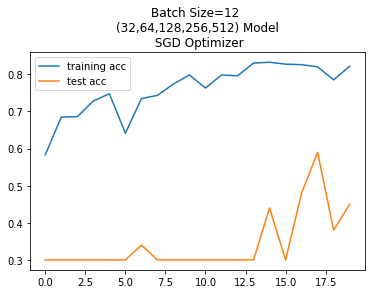

In [18]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n SGD Optimizer')

Text(0.5,1,'Batch Size=12 \n(32,64,128,256,512) Model\n Adam Optimizer')

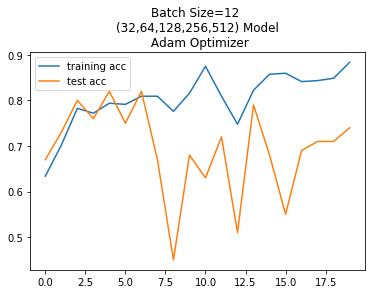

In [13]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,64,128,256,512) Model\n Adam Optimizer')

Text(0.5,1,'Batch Size=12 \n(32,32,64,64) Model')

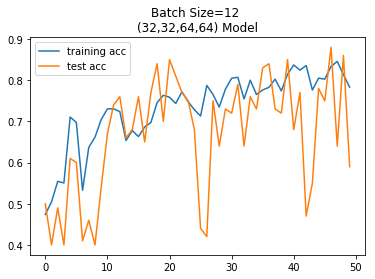

In [103]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=12 \n(32,32,64,64) Model')

Text(0.5,1,'Batch Size=6 \n(32,32,64,64,x64) Model')

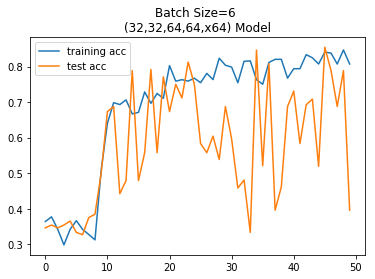

In [77]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')
plt.legend()
plt.title('Batch Size=6 \n(32,32,64,64,x64) Model')

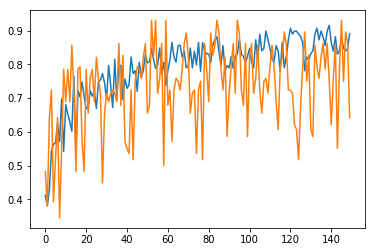

In [55]:
plt.plot(hist.history['acc'],label='training acc')
plt.plot(hist.history['val_acc'],label='test acc')